In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import optuna

seed=42


In [61]:
data=pd.read_csv('laptop_data.csv')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
data.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [5]:
data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [6]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

C:\Users\omid\AppData\Local\Temp\ipykernel_20592\3617746021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


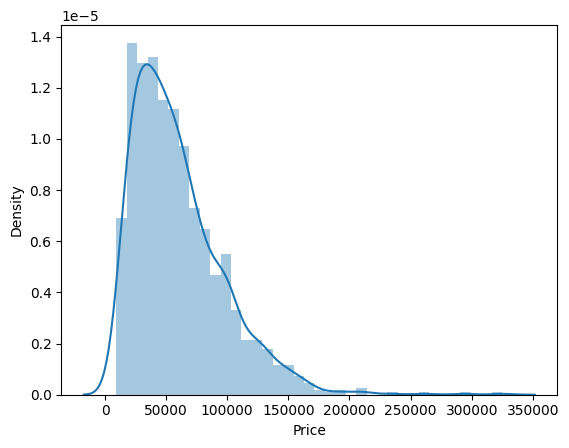

In [15]:
sns.distplot(data['Price'])
plt.show()

C:\Users\omid\AppData\Local\Temp\ipykernel_9808\2542071263.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='Company', order=data['Company'].value_counts().index, palette='viridis')


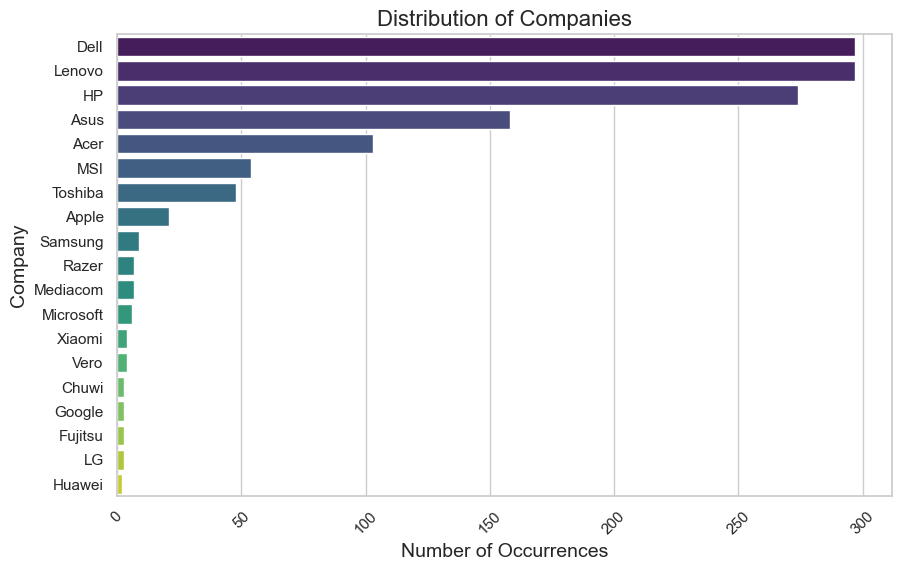

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='Company', order=data['Company'].value_counts().index, palette='viridis')

ax.set_title('Distribution of Companies', fontsize=16)
ax.set_xlabel('Number of Occurrences', fontsize=14)
ax.set_ylabel('Company', fontsize=14)

plt.xticks(rotation=45)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\1514375169.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Company', y='Price', data=data, palette='viridis')


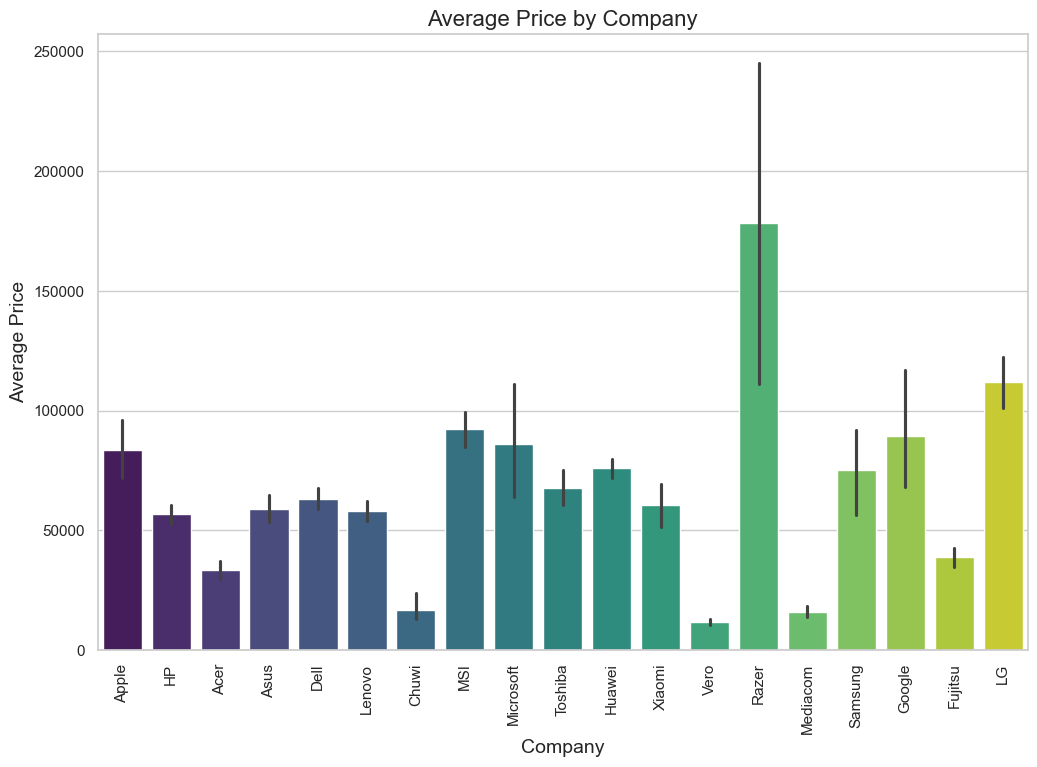

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Company', y='Price', data=data, palette='viridis')

ax.set_title('Average Price by Company', fontsize=16)
ax.set_xlabel('Company', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

plt.xticks(rotation=90)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\1719982616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='TypeName', order=data['TypeName'].value_counts().index, palette='magma')


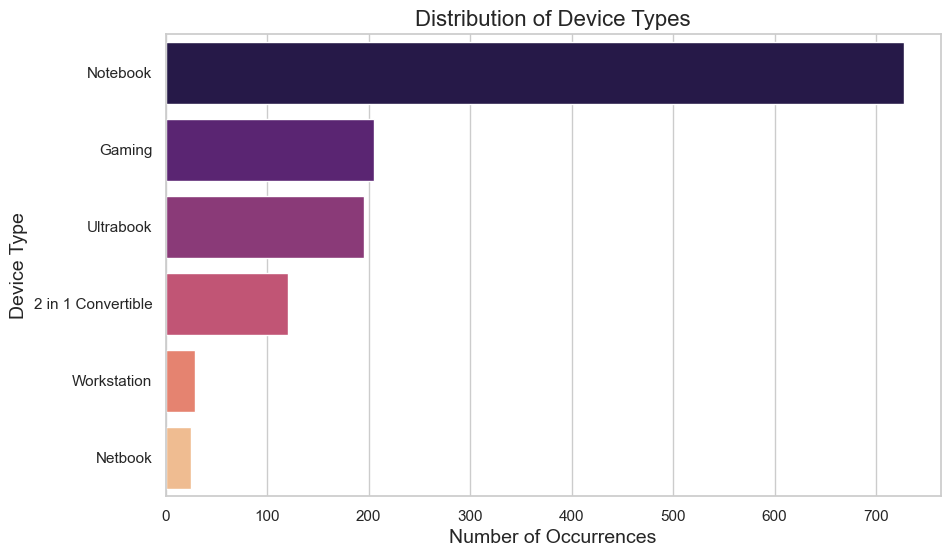

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='TypeName', order=data['TypeName'].value_counts().index, palette='magma')

ax.set_title('Distribution of Device Types', fontsize=16)
ax.set_xlabel('Number of Occurrences', fontsize=14)
ax.set_ylabel('Device Type', fontsize=14)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\4033813856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='TypeName', y='Price', data=data, palette='coolwarm')


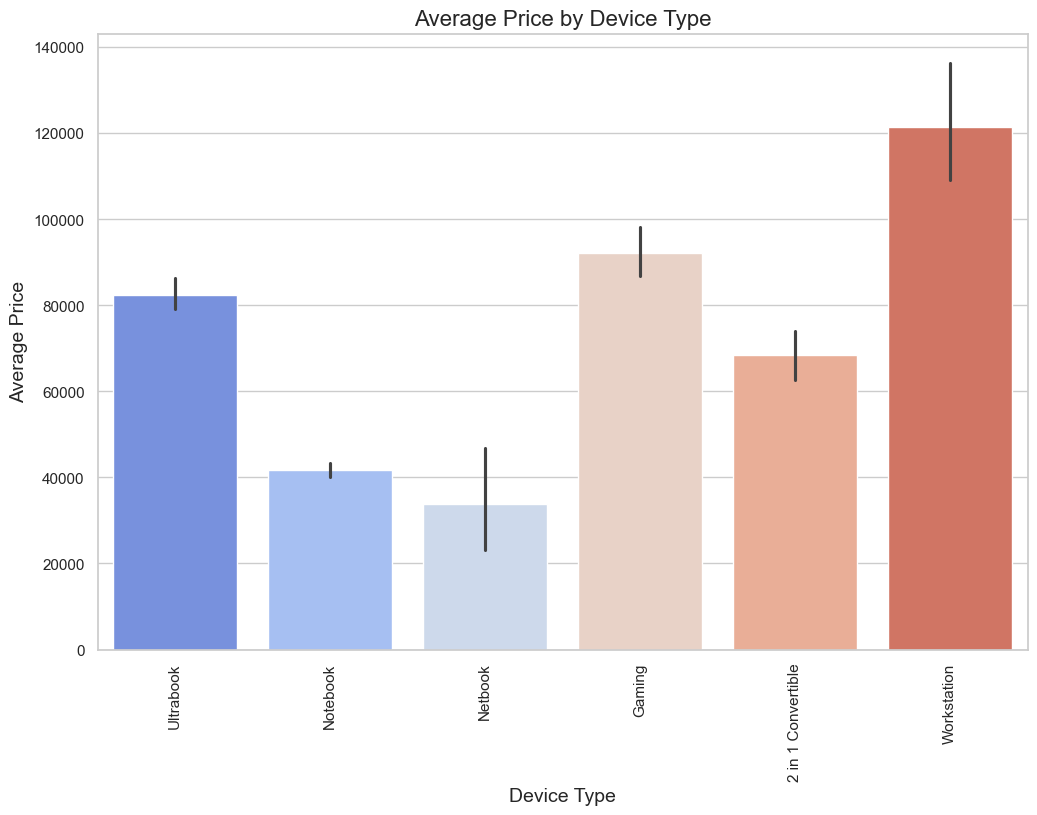

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='TypeName', y='Price', data=data, palette='coolwarm')

ax.set_title('Average Price by Device Type', fontsize=16)
ax.set_xlabel('Device Type', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

plt.xticks(rotation=90)

plt.show()


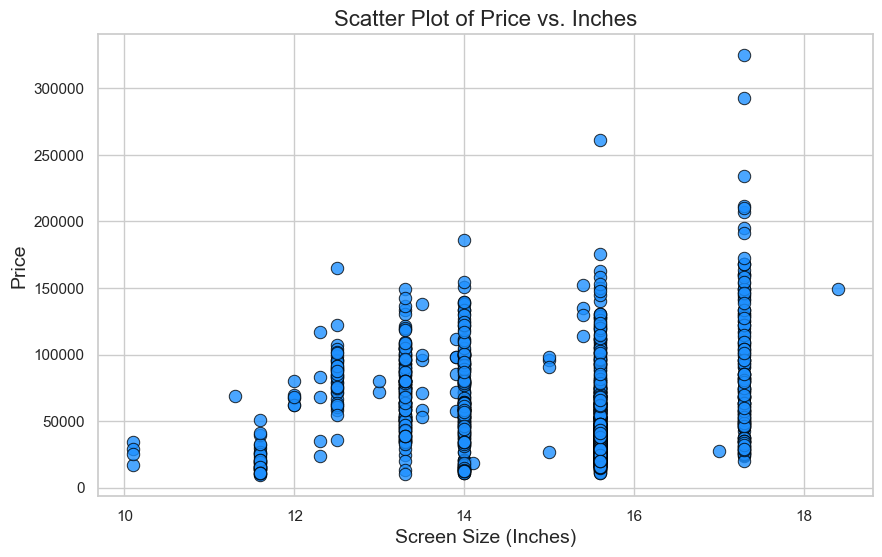

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Inches', y='Price', data=data, color='dodgerblue', edgecolor='black', s=80, alpha=0.8)

ax.set_title('Scatter Plot of Price vs. Inches', fontsize=16)
ax.set_xlabel('Screen Size (Inches)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\2681153019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='Ram', order=data['Ram'].value_counts().index, palette='magma')


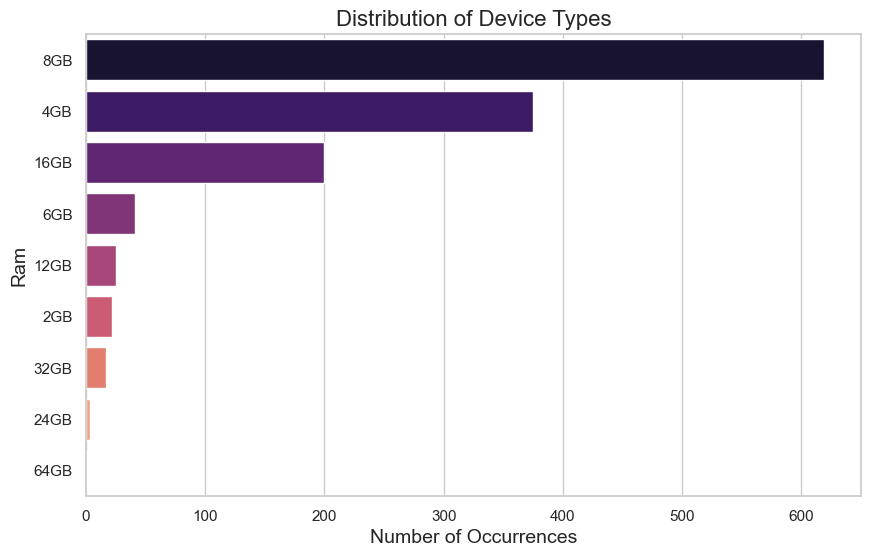

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='Ram', order=data['Ram'].value_counts().index, palette='magma')

ax.set_title('Distribution of Device Types', fontsize=16)
ax.set_xlabel('Number of Occurrences', fontsize=14)
ax.set_ylabel('Ram', fontsize=14)

plt.show()


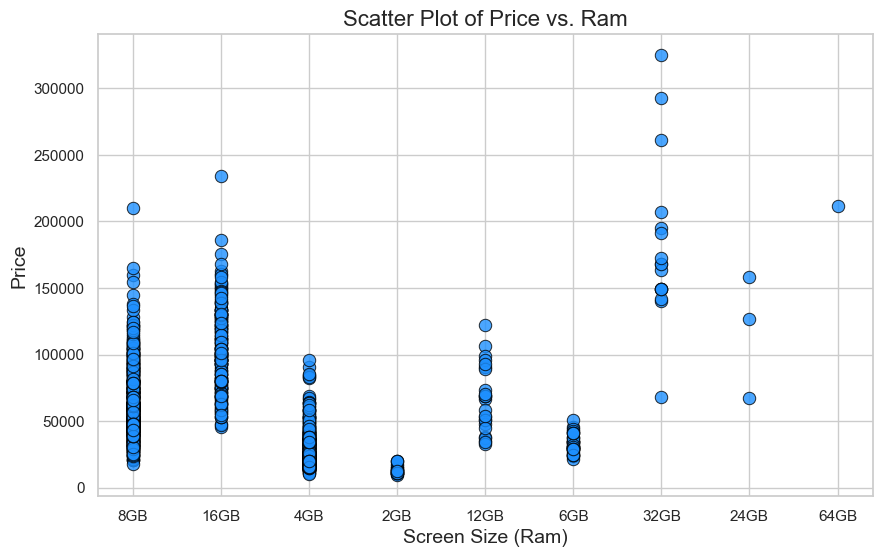

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Ram', y='Price', data=data, color='dodgerblue', edgecolor='black', s=80, alpha=0.8)

ax.set_title('Scatter Plot of Price vs. Ram', fontsize=16)
ax.set_xlabel('Screen Size (Ram)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\3644999190.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='Memory', order=data['Memory'].value_counts().index, palette='magma')


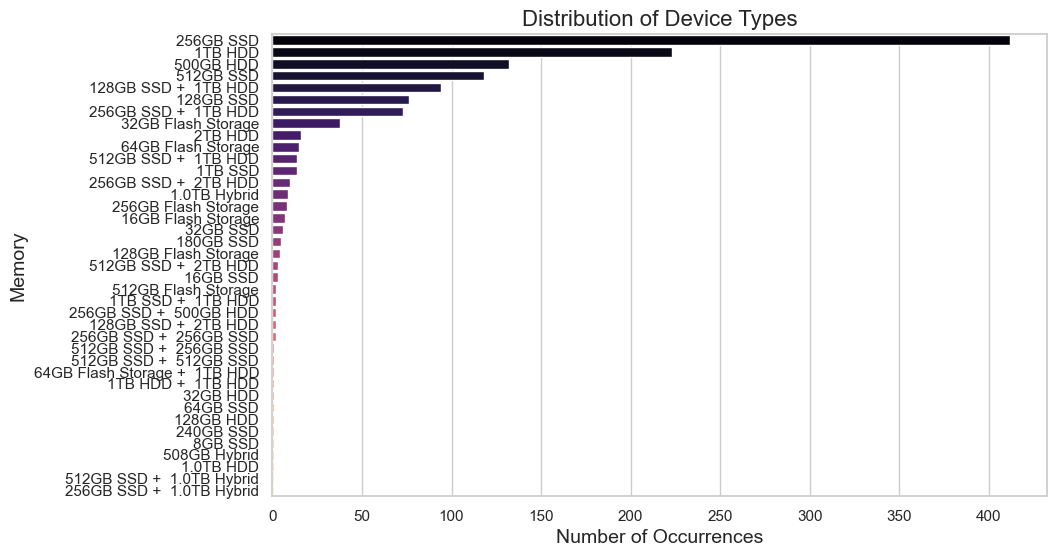

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Memory', y='Price', data=data, color='dodgerblue', edgecolor='black', s=80, alpha=0.8)

ax.set_title('Scatter Plot of Price vs. Inches', fontsize=16)
ax.set_xlabel('Screen Size (Inches)', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\2707301451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, y='OpSys', order=data['OpSys'].value_counts().index, palette='magma')


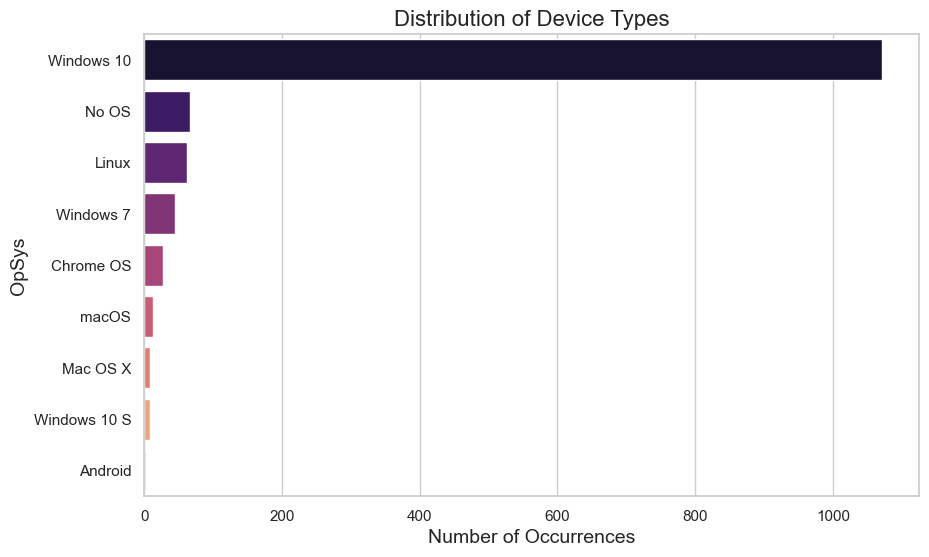

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, y='OpSys', order=data['OpSys'].value_counts().index, palette='magma')

ax.set_title('Distribution of Device Types', fontsize=16)
ax.set_xlabel('Number of Occurrences', fontsize=14)
ax.set_ylabel('OpSys', fontsize=14)

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_9808\3463420652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='OpSys', y='Price', data=data, palette='coolwarm')


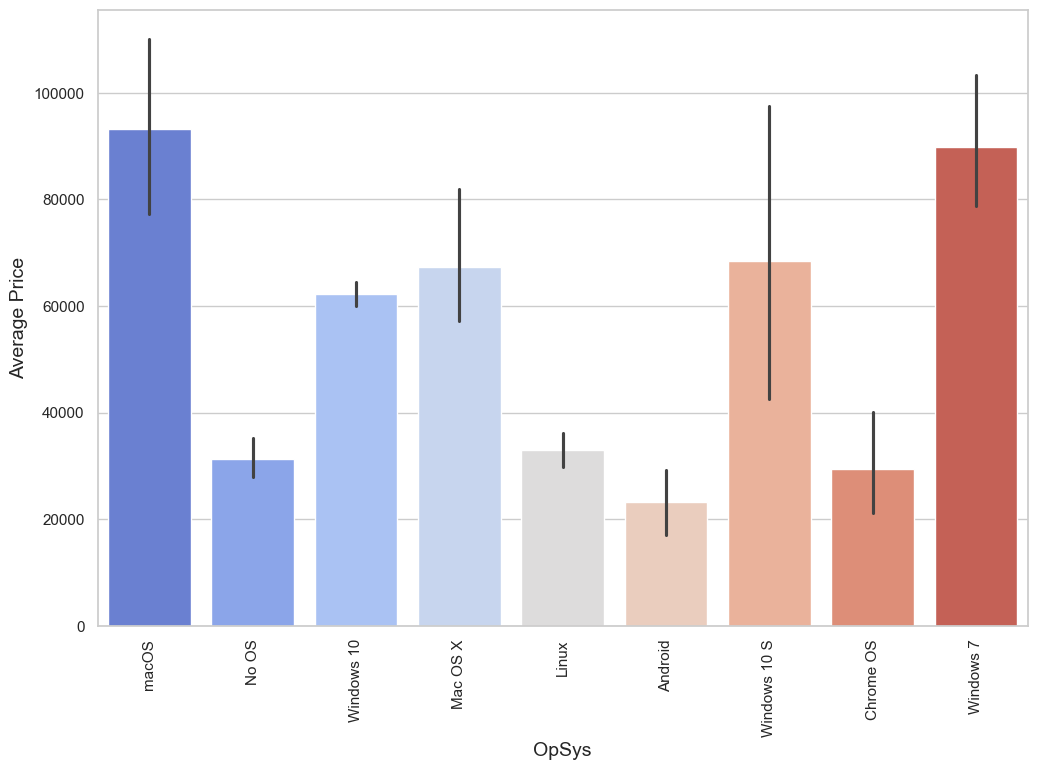

In [26]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='OpSys', y='Price', data=data, palette='coolwarm')

ax.set_xlabel('OpSys', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

plt.xticks(rotation=90)

plt.show()


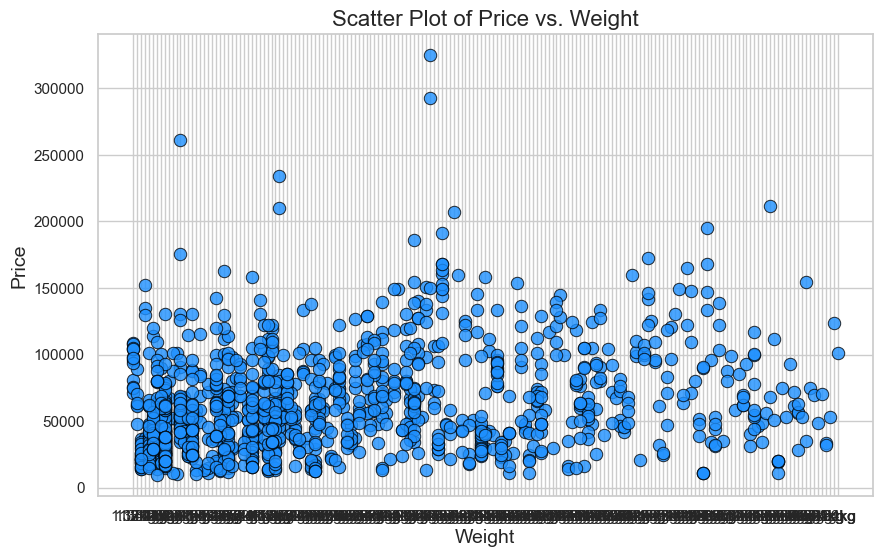

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Weight', y='Price', data=data, color='dodgerblue', edgecolor='black', s=80, alpha=0.8)

ax.set_title('Scatter Plot of Price vs. Weight', fontsize=16)
ax.set_xlabel('Weight', fontsize=14)
ax.set_ylabel('Price', fontsize=14)

plt.show()


In [62]:
data.drop(columns=['Unnamed: 0'], inplace=True)


In [63]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [64]:
data['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [65]:
data['resolution'] = data['ScreenResolution'].str.extract(r'(\d+x\d+)')
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768


In [66]:
data['screentype'] = data['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,Full HD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080,IPS Panel Full HD / Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800,IPS Panel Quad HD+ / Touchscreen
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,


In [67]:
data['screentype'] = data['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080,IPS Panel Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800,IPS Panel Touchscreen
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,


In [68]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0 )
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,IPS Panel Retina Display,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,IPS Panel Retina Display,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,IPS Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,1920x1080,IPS Panel Touchscreen,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,3200x1800,IPS Panel Touchscreen,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,,0


In [69]:
data['Touchscreen'].value_counts()


Touchscreen
0    1111
1     192
Name: count, dtype: int64

C:\Users\omid\AppData\Local\Temp\ipykernel_19944\1587753744.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Touchscreen', data=data, palette='coolwarm')


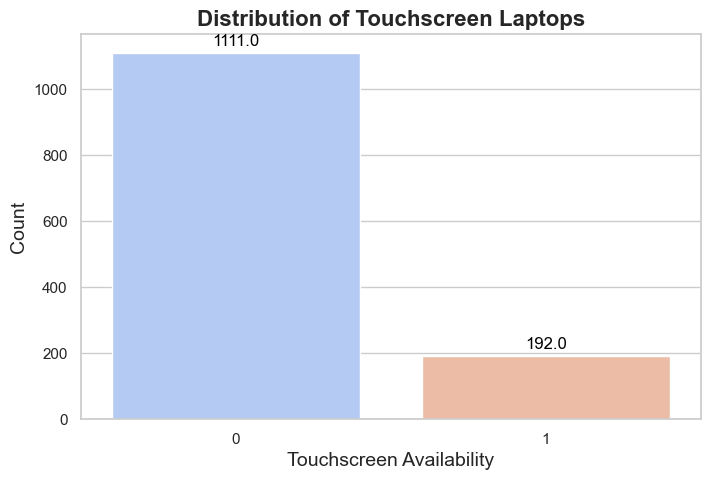

In [70]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Touchscreen', data=data, palette='coolwarm')

ax.set_title('Distribution of Touchscreen Laptops', fontsize=16, fontweight='bold')
ax.set_xlabel('Touchscreen Availability', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


C:\Users\omid\AppData\Local\Temp\ipykernel_19944\279009771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Touchscreen', y='Price', data=data, palette='viridis')


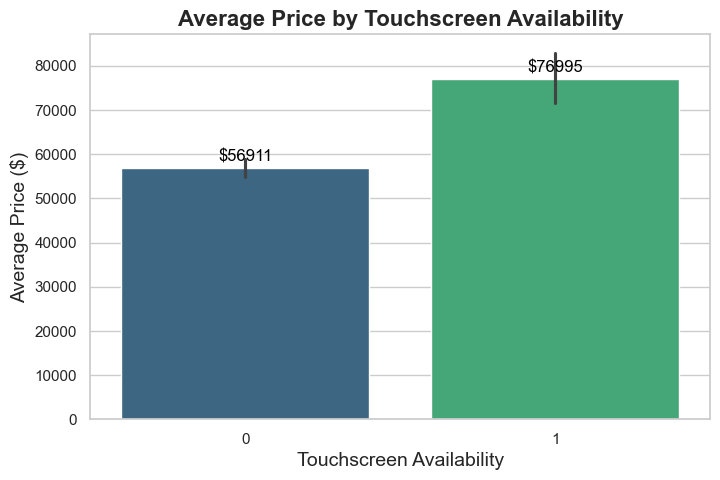

In [71]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Touchscreen', y='Price', data=data, palette='viridis')

ax.set_title('Average Price by Touchscreen Availability', fontsize=16, fontweight='bold')
ax.set_xlabel('Touchscreen Availability', fontsize=14)
ax.set_ylabel('Average Price ($)', fontsize=14)

for p in ax.patches:
    ax.annotate(f'${p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [72]:
data['screentype']=data['screentype'].replace(r' ','',regex=True)

data['screentype'].value_counts()


screentype
                         831
IPSPanel                 263
Touchscreen              107
IPSPanelTouchscreen       85
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [73]:
data['screentype'] = data['screentype'].replace(r'^\s*$', np.nan, regex=True)
data['screentype'].value_counts()


screentype
IPSPanel                 263
Touchscreen              107
IPSPanelTouchscreen       85
IPSPanelRetinaDisplay     17
Name: count, dtype: int64

In [74]:
data['Ram']=data['Ram'].str.replace('GB','')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,IPSPanelRetinaDisplay,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,NaN,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,NaN,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,IPSPanelRetinaDisplay,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,IPSPanelRetinaDisplay,0


In [75]:
data['Weight']=data['Weight'].str.replace('kg','')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,IPSPanelRetinaDisplay,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,NaN,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,NaN,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,IPSPanelRetinaDisplay,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,IPSPanelRetinaDisplay,0


In [76]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
resolution           object
screentype           object
Touchscreen           int64
dtype: object

In [77]:
data['Ram']=data['Ram'].astype('int32')

In [78]:
data['Weight']=data['Weight'].astype('float32')


In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  resolution        1303 non-null   object 
 12  screentype        472 non-null    object 
 13  Touchscreen       1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(1), object(9)
memory usage: 132.5+ KB


In [83]:
data = data.drop('ScreenResolution', axis=1)


In [84]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,IPSPanelRetinaDisplay,0,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,NaN,0,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,NaN,0,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,IPSPanelRetinaDisplay,0,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,IPSPanelRetinaDisplay,0,3.1


In [85]:
data['Cpu_freq'] = (
    data['Cpu']
    .str.extract(r'(\d+(?:\.\d+)?)GHz')   
)

data.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,IPSPanelRetinaDisplay,0,2.3,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,NaN,0,1.8,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,NaN,0,2.5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,IPSPanelRetinaDisplay,0,2.7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,IPSPanelRetinaDisplay,0,3.1,3.1


In [86]:
# Remove 'GHz' from the 'Cpu_freq' column and convert to float
data['Cpu_freq'] = data['Cpu_freq'].str.replace('GHz', '').astype(float)

# Rename the column to 'Cpu_freq(GHz)'
data.rename(columns={'Cpu_freq': 'Cpu_freq(GHz)'}, inplace=True)

# Display the first few rows to verify changes
data.head()


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,IPSPanelRetinaDisplay,0,2.3,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,NaN,0,1.8,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,NaN,0,2.5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,IPSPanelRetinaDisplay,0,2.7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,IPSPanelRetinaDisplay,0,3.1,3.1


In [87]:
data['Cpu']= data['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)
data

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,IPSPanelRetinaDisplay,0,2.3,2.3
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,NaN,0,1.8,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,NaN,0,2.5,2.5
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,IPSPanelRetinaDisplay,0,2.7,2.7
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,IPSPanelRetinaDisplay,0,3.1,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1920x1080,IPSPanelTouchscreen,1,2.5,2.5
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,3200x1800,IPSPanelTouchscreen,1,2.5,2.5
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,1366x768,NaN,0,1.6,1.6
1301,HP,Notebook,15.6,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1366x768,NaN,0,2.5,2.5


In [88]:
data['memory_1']=data['Memory']

data['memory_1']=data['memory_1'].str.replace('1.0TB','1TB', regex=True)
data['memory_1']=data['memory_1'].str.replace('1TB','1000GB')
data['memory_1']=data['memory_1'].str.replace('2TB','2000GB')
data['memory_1']=data['memory_1'].str.replace('GB','')
data['memory_1'].value_counts()


memory_1
256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD 

In [89]:
data['memory2']=data['memory_1'].str.replace(r' ','')
data['memory2'].value_counts()


memory2
256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
24

In [90]:
memory_1=[]
memory_2=[]
for i in data['memory2']:
    if len(re.findall(r'\+',i))==1: # DOUBLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: # SINGLE DRIVE
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')


In [91]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])


In [94]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)


In [95]:
data['memory_1_sto(GB)'] = memory_1_gb
data['memory_1_type'] = memory_1_type
data['memory_2_sto(GB)'] = memory_2_gb
data['memory_2_type'] = memory_2_type


In [96]:
data['memory_1_sto(GB)'] = data['memory_1_sto(GB)'].astype(float)
data['memory_2_sto(GB)'] = data['memory_2_sto(GB)'].astype(float)


In [97]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq(GHz),memory_1,memory2,memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,IPSPanelRetinaDisplay,0,2.3,2.3,128 SSD,128SSD,128.0,SSD,0.0,NaN
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,NaN,0,1.8,1.8,128 Flash Storage,128FlashStorage,128.0,FlashStorage,0.0,NaN
2,HP,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,NaN,0,2.5,2.5,256 SSD,256SSD,256.0,SSD,0.0,NaN
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,IPSPanelRetinaDisplay,0,2.7,2.7,512 SSD,512SSD,512.0,SSD,0.0,NaN
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,IPSPanelRetinaDisplay,0,3.1,3.1,256 SSD,256SSD,256.0,SSD,0.0,NaN


In [98]:
data=data.drop(['memory_1','memory2','Memory'], axis=1)


In [99]:
data = data.replace({'NaN': np.nan})


In [100]:
data.isnull().sum()

Company                0
TypeName               0
Inches                 0
Cpu                    0
Ram                    0
Gpu                    0
OpSys                  0
Weight                 0
Price                  0
resolution             0
screentype           831
Touchscreen            0
Cpu_freq(GHz)          0
Cpu_freq(GHz)          0
memory_1_sto(GB)       0
memory_1_type          0
memory_2_sto(GB)       0
memory_2_type       1095
dtype: int64

In [101]:
data['cpu_brand'] = data['Cpu'].str.extract(r'^(\w+)')
data['cpu_brand'].value_counts()


cpu_brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [102]:
data[data['cpu_brand']=='Samsung']


,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,2400x1600,IPSPanelTouchscreen,1,2.0,2.0,32.0,FlashStorage,0.0,NaN,Samsung


In [103]:
data=data.drop(1191)

In [104]:
data['gpu_brand'] = data['Gpu'].str.extract(r'^(\w+)')
data['gpu_brand'].value_counts()


gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

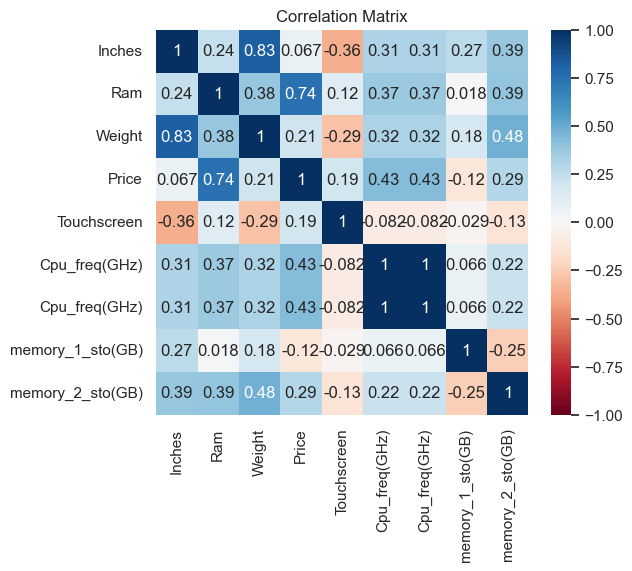

In [106]:
numeric_df = data.select_dtypes(include=[np.number])

plt.figure(figsize=(6,5))
sns.heatmap(numeric_df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [107]:
data['Price']=np.log(data['Price'])


C:\Users\omid\AppData\Local\Temp\ipykernel_19944\3087299700.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

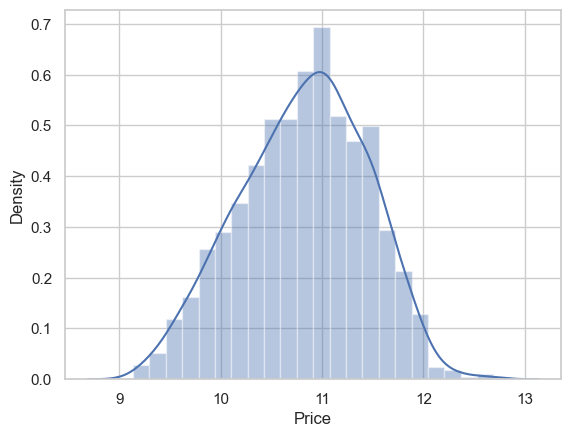

In [108]:
sns.distplot(data['Price'])


In [109]:
data=data.fillna('NaN')


In [110]:
catCols =  ['Company','TypeName','Cpu','Gpu','OpSys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand']


In [111]:
en = LabelEncoder()
for cols in catCols:
    data[cols] = en.fit_transform(data[cols])
print('Dataframe encoded by Label encoding dimension : ', data.shape)


Dataframe encoded by Label encoding dimension :  (1302, 20)


In [112]:
data

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,resolution,screentype,Touchscreen,Cpu_freq(GHz),Cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,1,4,13.3,51,8,57,8,1.37,11.175755,10,1,0,2.3,2.3,128.0,3,0.0,2,1,1
1,1,4,13.3,51,8,50,8,1.34,10.776777,1,3,0,1.8,1.8,128.0,0,0.0,2,1,1
2,7,3,15.6,57,8,52,4,1.86,10.329931,3,3,0,2.5,2.5,256.0,3,0.0,2,1,1
3,1,4,15.4,65,16,9,8,1.83,11.814476,12,1,0,2.7,2.7,512.0,3,0.0,2,1,0
4,1,4,13.3,51,8,58,8,1.37,11.473101,10,1,0,3.1,3.1,256.0,3,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,66,4,46,5,1.80,10.433899,3,2,1,2.5,2.5,128.0,3,0.0,2,1,1
1299,10,0,13.3,66,16,46,5,1.30,11.288115,13,2,1,2.5,2.5,512.0,3,0.0,2,1,1
1300,10,3,14.0,31,2,39,5,1.50,9.409283,0,3,0,1.6,1.6,64.0,0,0.0,2,1,1
1301,7,3,15.6,66,6,21,5,2.19,10.614129,0,3,0,2.5,2.5,1000.0,1,0.0,2,1,0


In [113]:
X=data.drop('Price', axis = 1).values


In [114]:
y=data['Price'].values


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)


In [116]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = seed)


In [117]:
feature_name_list=data.drop('Price', axis = 1).columns


In [118]:
data.feature_names = feature_name_list


C:\Users\omid\AppData\Local\Temp\ipykernel_19944\797929391.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.feature_names = feature_name_list


In [119]:
def objective(trial, X_train=X_train, X_val=X_val, y_train=y_train, y_val=y_val):
    dtrain = xgboost.DMatrix(X_train, label=y_train)
    dvalid = xgboost.DMatrix(X_val, label=y_val)

    param = {
        'objective' : 'reg:squarederror',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.001,0.01,0.05,0.1,0.2,0.25,0.3]),
        'n_estimators': trial.suggest_categorical('n_estimators', [300,400,500,1000,1500,2000,2500,3000]),
        'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
    }


    model = xgboost.XGBRegressor(**param)    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=100, verbose=False)   
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)

    return rmse


In [120]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")

params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))


[I 2024-09-09 13:26:00,695] A new study created in memory with name: no-name-d69c30f8-3aef-48ed-bf8a-9d954fbc99a1
C:\Users\omid\AppData\Local\Temp\ipykernel_19944\3324610.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 5.0),
C:\Users\omid\AppData\Local\Temp\ipykernel_19944\3324610.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 5.0),
C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constru

Number of finished trials:  100
Best trial:
  Value: 0.17318765775587994
  Params: 
    lambda: 0.0015321429208780275
    alpha: 0.03379190700503012
    colsample_bytree: 0.8
    subsample: 0.5
    learning_rate: 0.1
    n_estimators: 400
    max_depth: 5
    min_child_weight: 1


In [129]:
# Unpack optimal hyperparameters from the params list
(
    lambda_opt,
    alpha_opt,
    colsample_bytree_opt,
    subsample_opt,
    learning_rate_opt,
    n_estimators_opt,
    max_depth_opt,
    min_child_weight_opt
) = params

# Print the optimal hyperparameters for verification
print(f"Optimal lambda: {lambda_opt}")
print(f"Optimal alpha: {alpha_opt}")
print(f"Optimal colsample_bytree: {colsample_bytree_opt}")
print(f"Optimal subsample: {subsample_opt}")
print(f"Optimal learning rate: {learning_rate_opt}")
print(f"Optimal number of estimators: {n_estimators_opt}")
print(f"Optimal max depth: {max_depth_opt}")
print(f"Optimal min child weight: {min_child_weight_opt}")


Optimal lambda: 0.0015321429208780275
Optimal alpha: 0.03379190700503012
Optimal colsample_bytree: 0.8
Optimal subsample: 0.5
Optimal learning rate: 0.1
Optimal number of estimators: 400
Optimal max depth: 5
Optimal min child weight: 1


In [123]:
xgb = XGBRegressor(reg_lambda = lambda_opt,
                   alpha = alpha_opt,
                   colsample_bytree = colsample_bytree_opt,
                   subsample_opt = subsample_opt,
                   learning_rate = learning_rate_opt,
                   n_estimators = n_estimators_opt,
                   max_depth = max_depth_opt,
                   min_child_weight = min_child_weight_opt)


In [124]:
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=0)


C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\omid\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:160: UserWarning: [13:27:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "subsample_opt" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=0.03379190700503012, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=None,
             num_parallel_tree=None, ...)

In [125]:
y_pred_xgb = xgb.predict(X_test) 


In [126]:
mse_xgb = mean_squared_error(np.exp(y_test), np.exp(y_pred_xgb))


In [127]:
rmse_xgb = np.sqrt(mse_xgb)
rmse_xgb_rounded = round(rmse_xgb, 2)

# Print RMSE with formatted string
print(f"RMSE with XGBoost: ${rmse_xgb_rounded:.2f}")


RMSE with XGBoost : 14115.60 $


In [128]:
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb_percentage = np.round(r2_xgb * 100, 2)

# Print R^2 score as a percentage with formatted string
print(f"R^2 with XGBoost: {r2_xgb_percentage:.2f} %")




R2 with XGBoost: 90.76 % 
